<a href="https://colab.research.google.com/github/Areeb-07/WiDS-IPL/blob/main/DataPre_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

# Mounting Drive

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Getting Data

In [3]:
matches = pd.read_csv('/content/drive/My Drive/matches.csv')
deliveries = pd.read_csv('/content/drive/My Drive/deliveries.csv')

# Data Pre-processing

### A look at the datasets

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [6]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [7]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

deliveries.describe()

In [10]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Filling null values in 'city' column based on 'venue' values

In [11]:
matches[(matches["city"].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [12]:
matches[(matches["venue"]=="Dubai International Cricket Stadium")]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [13]:
matches.loc[(matches.venue == 'Dubai International Cricket Stadium'),'city']='Dubai'

In [14]:
matches[(matches["venue"]=="Dubai International Cricket Stadium")]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [15]:
matches[(matches["city"].isnull())]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


### Replacing two names for the same team

In [16]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [17]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [18]:
matches.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [19]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [20]:
deliveries.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [21]:
deliveries.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [22]:
matches.loc[(matches.team1 == 'Rising Pune Supergiants'),'team1']='Rising Pune Supergiant'
matches.loc[(matches.team2 == 'Rising Pune Supergiants'),'team2']='Rising Pune Supergiant'
matches.loc[(matches.toss_winner == 'Rising Pune Supergiants'),'toss_winner']='Rising Pune Supergiant'
matches.loc[(matches.winner == 'Rising Pune Supergiants'),'winner']='Rising Pune Supergiant'
deliveries.loc[(deliveries.batting_team == 'Rising Pune Supergiants'),'batting_team']='Rising Pune Supergiant'
deliveries.loc[(deliveries.bowling_team == 'Rising Pune Supergiants'),'bowling_team']='Rising Pune Supergiant'
matches.loc[(matches.team1 == 'Delhi Daredevils'),'team1']='Delhi Capitals'
matches.loc[(matches.team2 == 'Delhi Daredevils'),'team2']='Delhi Capitals'
matches.loc[(matches.toss_winner == 'Delhi Daredevils'),'toss_winner']='Delhi Capitals'
matches.loc[(matches.winner == 'Delhi Daredevils'),'winner']='Delhi Capitals'
deliveries.loc[(deliveries.batting_team == 'Delhi Daredevils'),'batting_team']='Delhi Capitals'
deliveries.loc[(deliveries.bowling_team == 'Delhi Daredevils'),'bowling_team']='Delhi Capitals'

In [23]:
matches.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [24]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [25]:
matches.toss_winner.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [26]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians', 'Delhi Capitals',
       'Gujarat Lions', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Pune Warriors', 'Kochi Tuskers Kerala', nan],
      dtype=object)

In [27]:
deliveries.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [28]:
deliveries.bowling_team.unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors'],
      dtype=object)

### Changing column 'date' to type 'datetime'

In [29]:
matches['date'] = pd.to_datetime(matches['date'])

In [30]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               756 non-null    int64         
 1   season           756 non-null    int64         
 2   city             756 non-null    object        
 3   date             756 non-null    datetime64[ns]
 4   team1            756 non-null    object        
 5   team2            756 non-null    object        
 6   toss_winner      756 non-null    object        
 7   toss_decision    756 non-null    object        
 8   result           756 non-null    object        
 9   dl_applied       756 non-null    int64         
 10  winner           752 non-null    object        
 11  win_by_runs      756 non-null    int64         
 12  win_by_wickets   756 non-null    int64         
 13  player_of_match  752 non-null    object        
 14  venue            756 non-null    object   

### Dropping insignificant columns with very large number of missing values

In [31]:
matches.isnull().sum()

id                   0
season               0
city                 0
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [32]:
matches.drop(['umpire3'], axis = 1, inplace = True)

In [33]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [34]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [35]:
deliveries.drop(['player_dismissed', 'dismissal_kind','fielder'], axis = 1, inplace = True)

In [36]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2


### Dropping rows with missing 'winner' values

In [37]:
matches.drop(matches[matches['winner'].isnull()].index, inplace = True)

### Filling Nan values

In [38]:
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [39]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            2
umpire2            2
dtype: int64

In [40]:
str_cols = matches.columns[matches.dtypes==object]
matches[str_cols] = matches[str_cols].fillna('.')

In [41]:
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# Exploratory Data Analysis

## The team with the most number of wins per season

In [42]:
wins = matches.groupby('season')['winner'].value_counts()
wins

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Capitals                  7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [43]:
# Making DataFrame
year = 2008
win_per_season= pd.DataFrame(columns=['Season', 'Team', 'Number of Wins'])
for items in wins.iteritems():    
    if items[0][0]==year:
        win_series = pd.DataFrame({
            'Season': [items[0][0]],
            'Team': [items[0][1]],
            'Number of Wins': [items[1]]
        })
        win_per_season = win_per_season.append(win_series)
        year += 1   
win_per_season

,Season,Team,Number of Wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Capitals,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


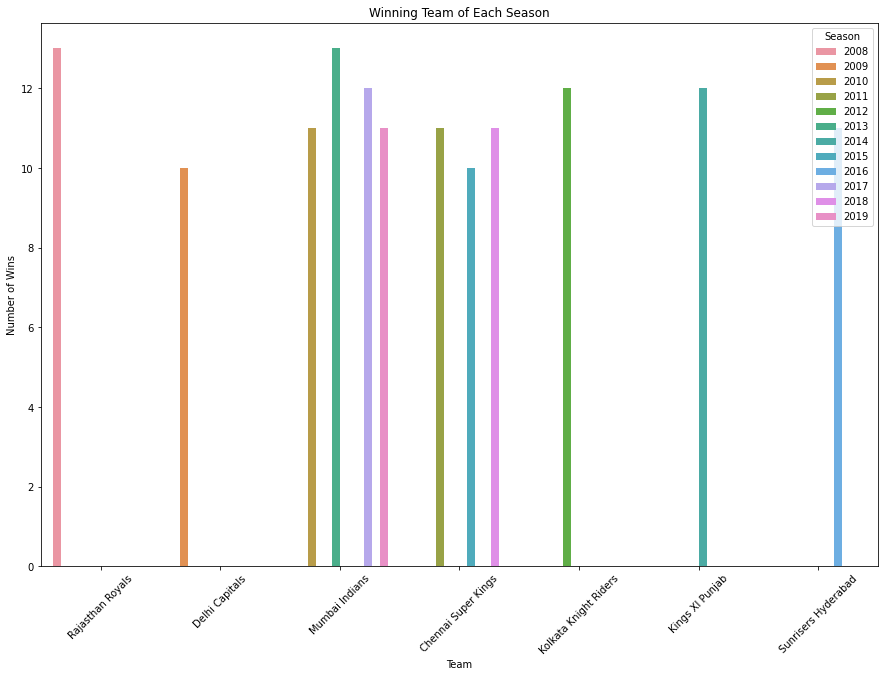

In [44]:
# Making a Plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=win_per_season['Team'], y=win_per_season['Number of Wins'],hue=win_per_season['Season'])
plt.xticks(rotation=45)
plt.title("Winning Team of Each Season")
plt.show()

- Mumbai Indians has secured the most wins in four seasons (2010, 2013, 2017, and 2019).
- Chennai Super Kings has secured the second most wins in three seasons(2011, 2015, and 2018).

## The venue that hosted the maximum number of matches

In [45]:
max_matches=pd.DataFrame(matches['venue'].value_counts()).reset_index()
max_matches.rename(columns={'index':'venue','venue':'matches'}, inplace=True)
max_matches

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,71
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


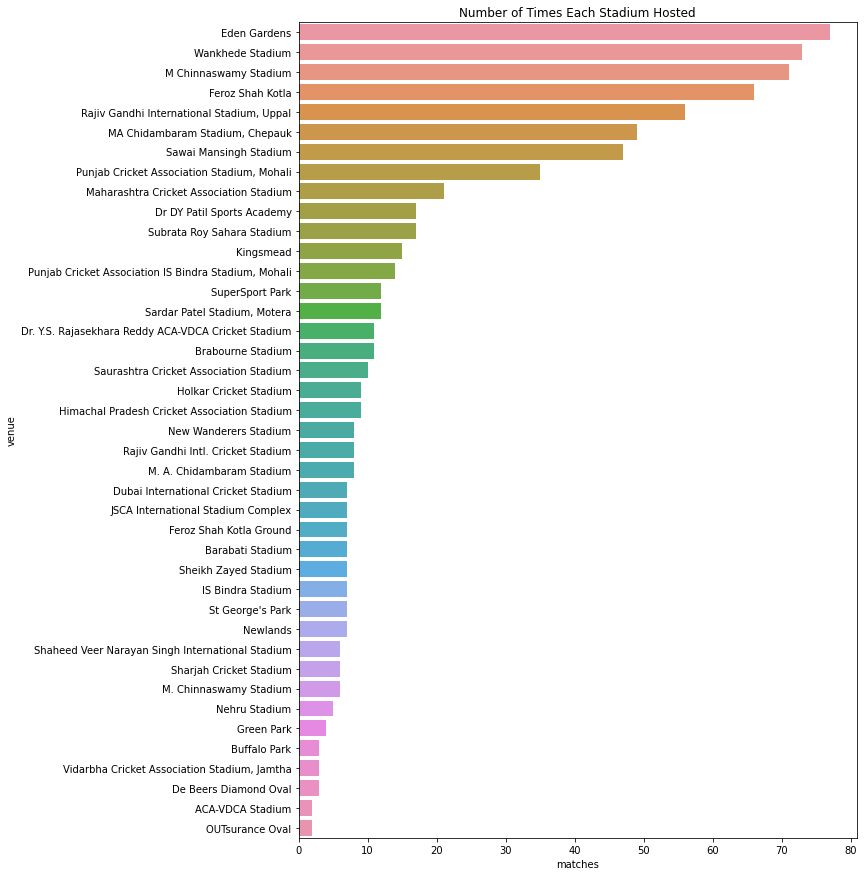

In [46]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(y=max_matches['venue'], x=max_matches['matches'])
plt.title("Number of Times Each Stadium Hosted")
plt.show()

## The most successful IPL team

### Total number of wins of each team

In [47]:
winning_teams=pd.DataFrame(matches['winner'].value_counts()).reset_index()
winning_teams.rename(columns={'index':'Team','winner':'Number of Wins'},inplace=True)
winning_teams

,Team,Number of Wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


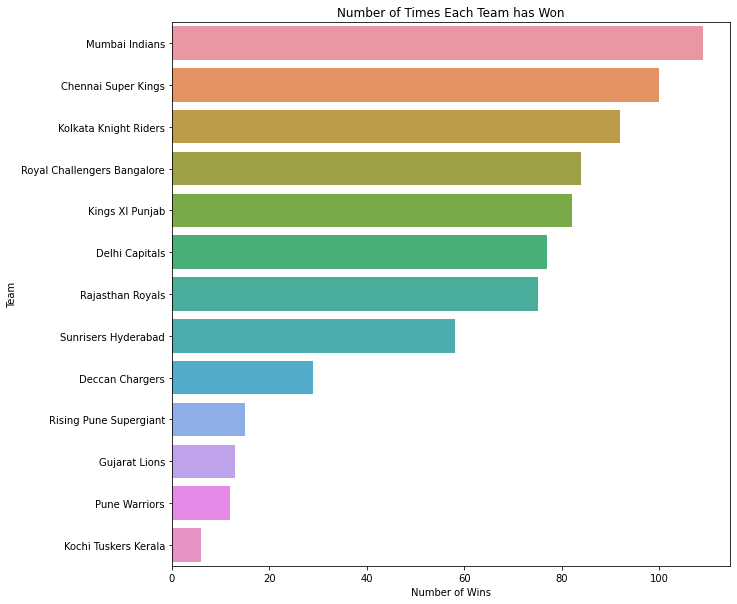

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=winning_teams['Team'], x=winning_teams['Number of Wins'])
plt.title("Number of Times Each Team has Won")
plt.show()

### Percentage wins of each team

In [49]:
matches_played_byteams=pd.concat([matches['team1'],matches['team2']])
matches_played_byteams=matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns=['Team','Total Matches']
matches_played_byteams.set_index('Team',inplace=True)
winning_teams.set_index('Team',inplace=True)
matches_played_byteams

,Total Matches
Team,
Mumbai Indians,187
Kolkata Knight Riders,178
Royal Challengers Bangalore,177
Kings XI Punjab,176
Delhi Capitals,175
Chennai Super Kings,164
Rajasthan Royals,145
Sunrisers Hyderabad,108
Deccan Chargers,75


In [50]:
actual_wins=pd.concat([matches_played_byteams,winning_teams],axis=1).reset_index()
L=[]
for i in range(actual_wins.shape[0]):
  d=actual_wins.loc[i,'Total Matches']
  n=actual_wins.loc[i,'Number of Wins']
  p=(n/d)*100
  L.append(p)
c=pd.DataFrame({"Percentage-Wins":L})
actual_wins_of_teams=pd.concat([actual_wins,c],axis=1).reset_index()
actual_wins_of_teams.drop(['level_0'], axis = 1, inplace = True)
actual_wins_of_teams.rename(columns={'index':'Team'},inplace=True)
actual_wins_of_teams

,Team,Total Matches,Number of Wins,Percentage-Wins
0,Mumbai Indians,187,109,58.288770
1,Kolkata Knight Riders,178,92,51.685393
2,Royal Challengers Bangalore,177,84,47.457627
3,Kings XI Punjab,176,82,46.590909
4,Delhi Capitals,175,77,44.000000
5,Chennai Super Kings,164,100,60.975610
6,Rajasthan Royals,145,75,51.724138
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,45,12,26.666667


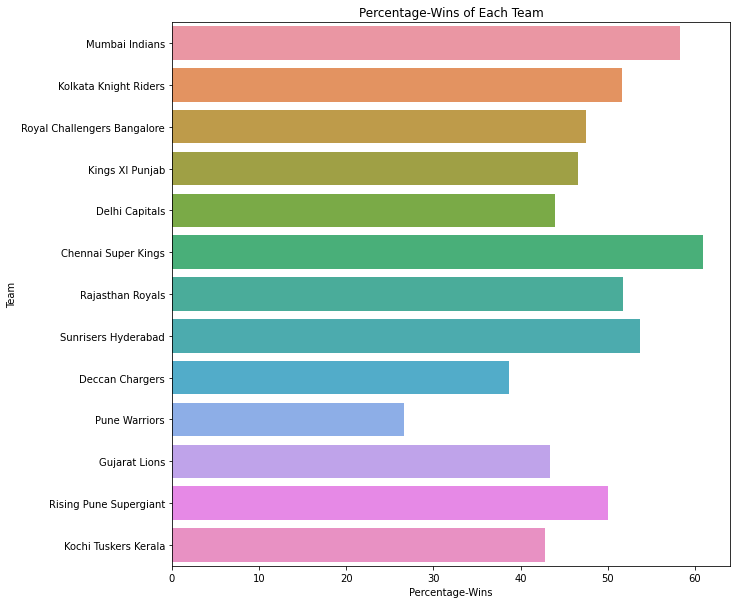

In [51]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=actual_wins_of_teams['Team'], x=actual_wins_of_teams['Percentage-Wins'])
plt.title("Percentage-Wins of Each Team")
plt.show()

## Most Valuable Player

In [52]:
man_of_the_match=pd.DataFrame(matches['player_of_match'].value_counts()).reset_index()
man_of_the_match.rename(columns={'index':'Player','player_of_match':'Number of Times'},inplace=True)
man_of_the_match

,Player,Number of Times
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,DA Warner,17
4,MS Dhoni,17
...,...,...
221,J Theron,1
222,RS Bopara,1
223,P Shaw,1
224,Q de Kock,1


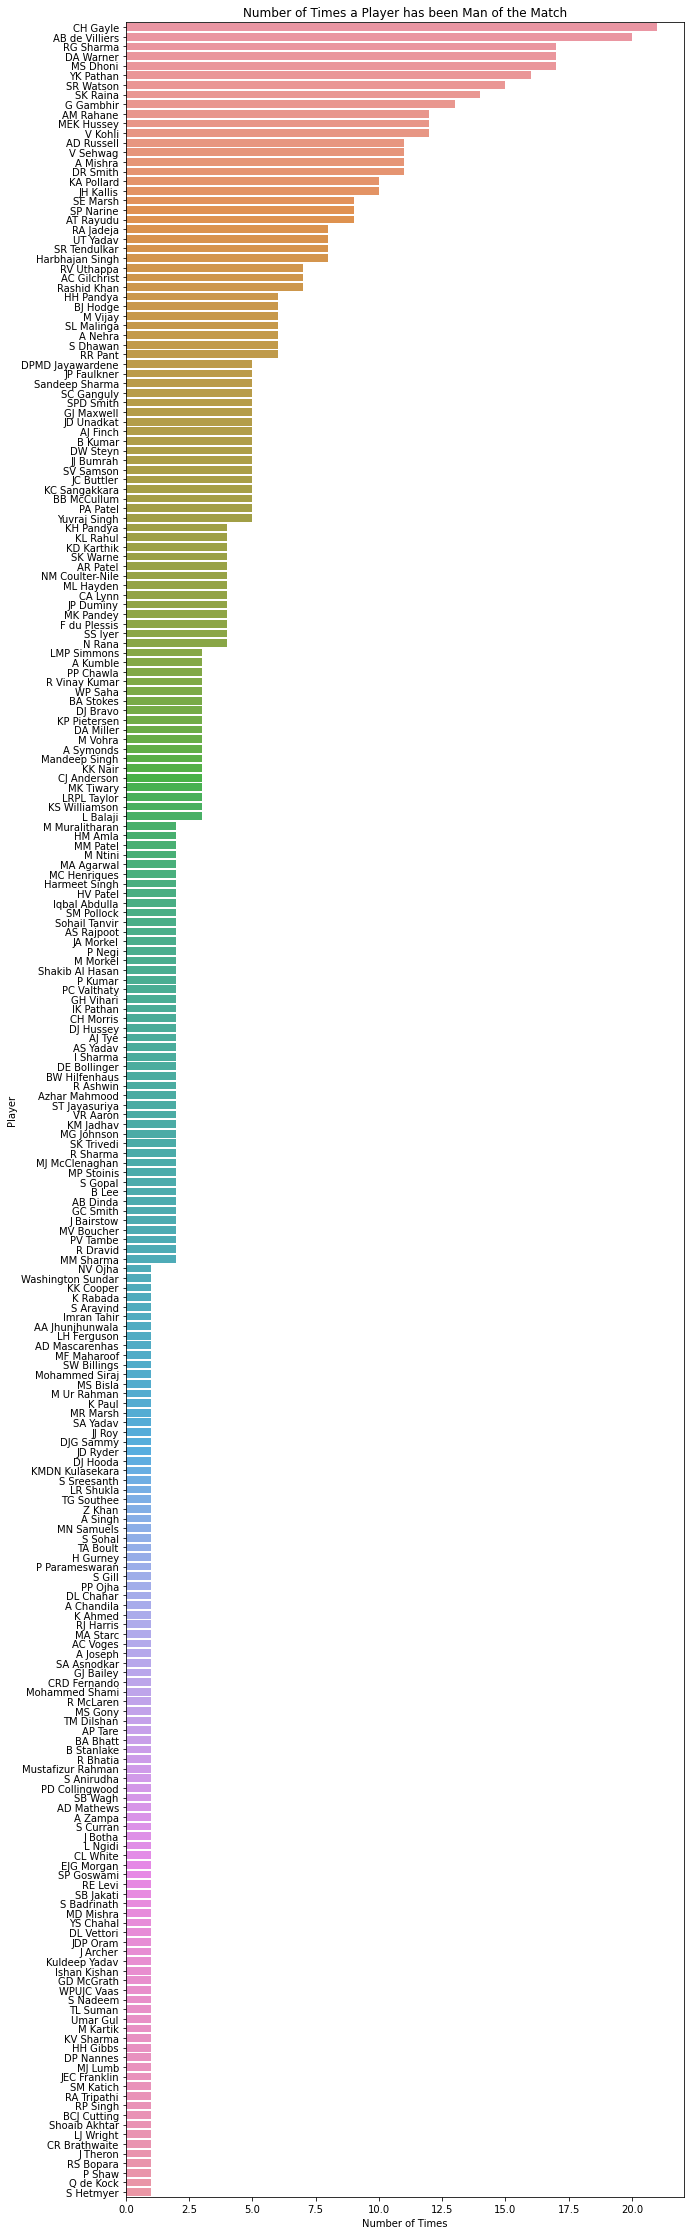

In [53]:
fig, ax = plt.subplots(figsize=(10, 40))
sns.barplot(y=man_of_the_match['Player'], x=man_of_the_match['Number of Times'])
plt.title("Number of Times a Player has been Man of the Match")
plt.show()

## The Luckiest IPL Team

### The number of toss wins by each team

In [54]:
toss_winner=pd.DataFrame(matches['toss_winner'].value_counts()).reset_index()
toss_winner.rename(columns={'index':'Team','toss_winner':'Number of Wins'},inplace=True)
toss_winner

,Team,Number of Wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Delhi Capitals,89
4,Kings XI Punjab,81
5,Royal Challengers Bangalore,80
6,Rajasthan Royals,78
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


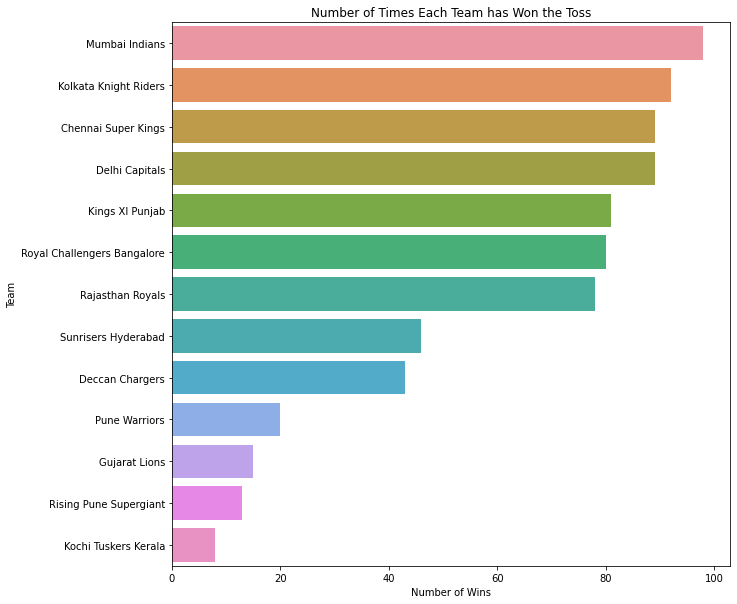

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=toss_winner['Team'], x=toss_winner['Number of Wins'])
plt.title("Number of Times Each Team has Won the Toss")
plt.show()

### Percentage toss wins by each team

In [56]:
toss_winner.set_index('Team',inplace=True)
matches_played_byteams

,Total Matches
Team,
Mumbai Indians,187
Kolkata Knight Riders,178
Royal Challengers Bangalore,177
Kings XI Punjab,176
Delhi Capitals,175
Chennai Super Kings,164
Rajasthan Royals,145
Sunrisers Hyderabad,108
Deccan Chargers,75


In [57]:
actual_tosswins=pd.concat([matches_played_byteams,toss_winner],axis=1).reset_index()
L=[]
for i in range(actual_tosswins.shape[0]):
  d=actual_tosswins.loc[i,'Total Matches']
  n=actual_tosswins.loc[i,'Number of Wins']
  p=(n/d)*100
  L.append(p)
c=pd.DataFrame({"Percentage-Wins":L})
actual_tosswins_of_teams=pd.concat([actual_tosswins,c],axis=1).reset_index()
actual_tosswins_of_teams.drop(['level_0'], axis = 1, inplace = True)
actual_tosswins_of_teams.rename(columns={'index':'Team'},inplace=True)
actual_tosswins_of_teams

,Team,Total Matches,Number of Wins,Percentage-Wins
0,Mumbai Indians,187,98,52.406417
1,Kolkata Knight Riders,178,92,51.685393
2,Royal Challengers Bangalore,177,80,45.197740
3,Kings XI Punjab,176,81,46.022727
4,Delhi Capitals,175,89,50.857143
5,Chennai Super Kings,164,89,54.268293
6,Rajasthan Royals,145,78,53.793103
7,Sunrisers Hyderabad,108,46,42.592593
8,Deccan Chargers,75,43,57.333333
9,Pune Warriors,45,20,44.444444


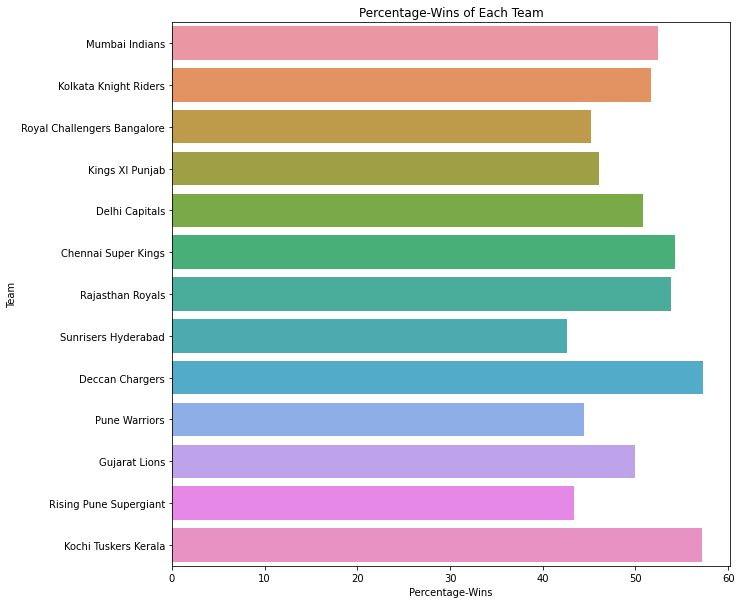

In [58]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y=actual_tosswins_of_teams['Team'], x=actual_tosswins_of_teams['Percentage-Wins'])
plt.title("Percentage-Wins of Each Team")
plt.show()

## The Top 10 Greatest Victories

### Victories by runs

In [59]:
by_runs=matches['win_by_runs']
victory_by_runs=by_runs.copy()
victory_by_runs.sort_values(ascending=False,inplace=True)
wins_by_runs=victory_by_runs[0:10]
wins_by_runs

43     146
619    144
59     140
556    138
410    130
706    118
295    111
114    105
676    102
182     98
Name: win_by_runs, dtype: int64

In [60]:
L=[]
for i in wins_by_runs.index:
  team1=matches.loc[i,'winner']
  if matches.loc[i,'team1']!=matches.loc[i,'winner']:
    team2=matches.loc[i,'team1']
  else:
    team2=matches.loc[i,'team2']
  s=team1+' vs '+team2
  L.append(s)
greatest_wins_by_runs=pd.DataFrame({'Team1vsTeam2':L,'runs_margin':wins_by_runs}).reset_index(drop=True)
greatest_wins_by_runs

,Team1vsTeam2,runs_margin
0,Mumbai Indians vs Delhi Capitals,146
1,Royal Challengers Bangalore vs Gujarat Lions,144
2,Kolkata Knight Riders vs Royal Challengers Ban...,140
3,Royal Challengers Bangalore vs Kings XI Punjab,138
4,Royal Challengers Bangalore vs Pune Warriors,130
5,Sunrisers Hyderabad vs Royal Challengers Banga...,118
6,Kings XI Punjab vs Royal Challengers Bangalore,111
7,Rajasthan Royals vs Delhi Capitals,105
8,Mumbai Indians vs Kolkata Knight Riders,102
9,Mumbai Indians vs Delhi Capitals,98


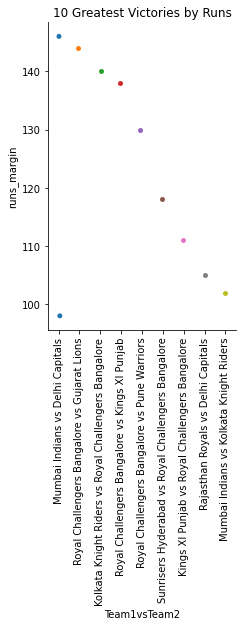

In [61]:
sns.catplot(x='Team1vsTeam2', y='runs_margin',data=greatest_wins_by_runs)
plt.title("10 Greatest Victories by Runs")
plt.xticks(rotation=90)
plt.show()

### Victories by wickets

In [62]:
by_wickets=matches['win_by_wickets']
victory_by_wickets=by_wickets.copy()
victory_by_wickets.sort_values(ascending=False,inplace=True)
wins_by_wickets=victory_by_wickets[0:10]
wins_by_wickets

376    10
590    10
298    10
34     10
71     10
119    10
542    10
2      10
183    10
683    10
Name: win_by_wickets, dtype: int64

In [63]:
L=[]
for i in wins_by_wickets.index:
  team1=matches.loc[i,'winner']
  if matches.loc[i,'team1']!=matches.loc[i,'winner']:
    team2=matches.loc[i,'team1']
  else:
    team2=matches.loc[i,'team2']
  s=team1+' vs '+team2
  L.append(s)
greatest_wins_by_wickets=pd.DataFrame({'Team1vsTeam2':L,'wickets_margin':wins_by_wickets}).reset_index(drop=True)
greatest_wins_by_wickets

,Team1vsTeam2,wickets_margin
0,Mumbai Indians vs Rajasthan Royals,10
1,Sunrisers Hyderabad vs Gujarat Lions,10
2,Rajasthan Royals vs Mumbai Indians,10
3,Kings XI Punjab vs Delhi Capitals,10
4,Deccan Chargers vs Mumbai Indians,10
5,Delhi Capitals vs Kings XI Punjab,10
6,Royal Challengers Bangalore vs Delhi Capitals,10
7,Kolkata Knight Riders vs Gujarat Lions,10
8,Royal Challengers Bangalore vs Rajasthan Royals,10
9,Royal Challengers Bangalore vs Kings XI Punjab,10


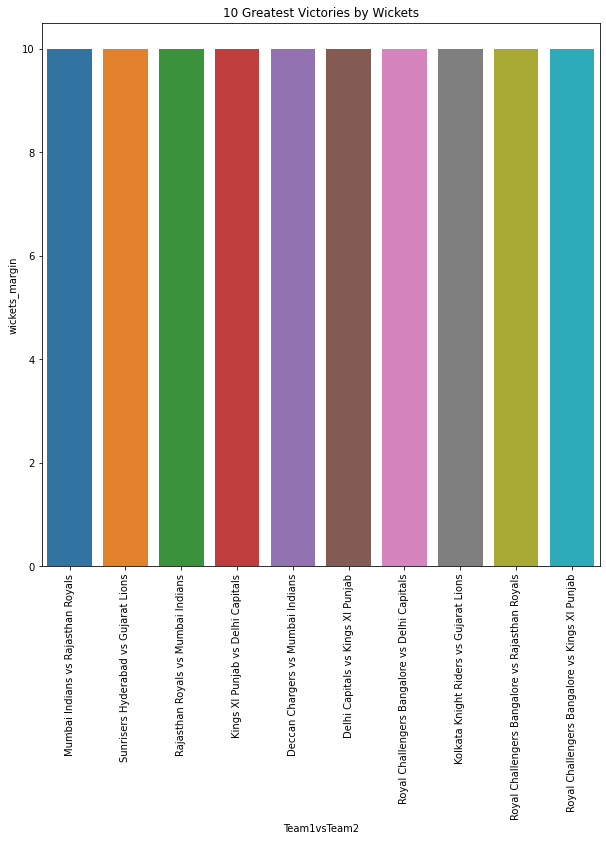

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=greatest_wins_by_wickets['Team1vsTeam2'], y=greatest_wins_by_wickets['wickets_margin'])
plt.title("10 Greatest Victories by Wickets")
plt.xticks(rotation=90)
plt.show()

## Most 50s and 100s scored

In [65]:
s_man_of_match = (matches.groupby(matches.player_of_match).player_of_match.count().sort_values(ascending=False).head(15))
df_man_of_match =(s_man_of_match.to_frame().rename(columns = {"player_of_match": "times"}).reset_index())
cen = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()
centuries = cen.sort_values(by='count').tail(15).reset_index(drop=True)
centuries

,batsman,count
0,SPD Smith,1
1,AT Rayudu,1
2,HM Amla,2
3,AC Gilchrist,2
4,AM Rahane,2
5,V Sehwag,2
6,SV Samson,2
7,KL Rahul,2
8,M Vijay,2
9,BB McCullum,2


In [66]:
half_cen = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()
half_centuries = half_cen.sort_values(by='count').tail(15).reset_index(drop=True)
half_centuries

,batsman,count
0,DR Smith,17
1,SR Watson,19
2,AT Rayudu,19
3,SE Marsh,20
4,MS Dhoni,23
5,RV Uthappa,24
6,AM Rahane,27
7,CH Gayle,28
8,AB de Villiers,34
9,G Gambhir,36


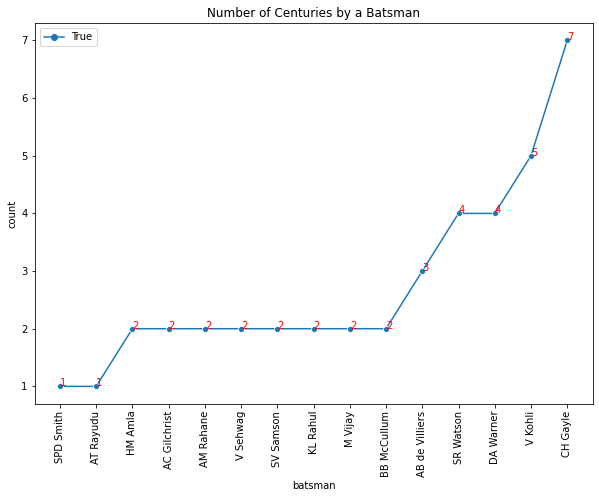

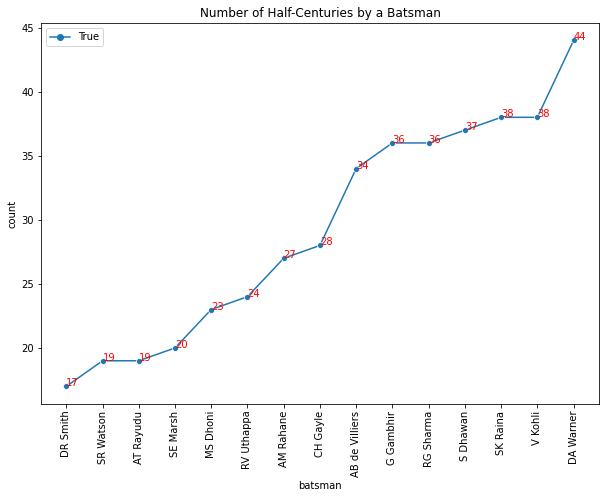

In [67]:
fig, ax = plt.subplots(figsize=(10, 7))
count=[True for i in range(centuries.shape[0])]
sns.lineplot(data=centuries, x="batsman", y="count", hue=count, style=count, markers=True)
plt.title("Number of Centuries by a Batsman")
plt.xticks(rotation=90)
plt.xticks(rotation=90)
for x,y in centuries[['batsman','count']].values:
  ax.text(x,y,y,color='r')
fig2, ax2 = plt.subplots(figsize=(10, 7))
sns.lineplot(data=half_centuries, x="batsman", y="count", hue=count, style=count, markers=True)
plt.title("Number of Half-Centuries by a Batsman")
plt.xticks(rotation=90)
for x,y in half_centuries[['batsman','count']].values:
  ax2.text(x,y,y,color='r')
plt.show()

## Scatter plot of batsmen

In [68]:
topbatsmen=deliveries['batsman'].value_counts()[:25].index
df_=deliveries.pivot_table(index=['batsman','over'],aggfunc=['count','sum'],values='total_runs')
df_=df_.fillna(0).reset_index()
df_.columns=['batsman','over','balls','runs']
df_['strike_rate']=round(df_.runs/df_.balls*100,1)
df_[df_.batsman.isin(topbatsmen)].pivot_table(columns='over',index='batsman',values='strike_rate',aggfunc='mean').fillna(0).style.format("{:.1f}")

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batsman,,,,,,,,,,,,,,,,,,,,
AB de Villiers,166.7,122.5,86.1,118.8,131.5,134.8,113.6,115.6,122.7,134.1,134.5,139.2,152.0,154.8,170.5,196.1,189.2,251.5,271.8,253.6
AM Rahane,89.7,115.9,119.1,137.1,147.2,130.6,102.5,108.5,104.7,136.1,115.8,129.9,129.2,155.5,154.5,144.0,165.9,177.9,111.6,181.2
AT Rayudu,117.9,85.9,103.2,106.0,109.7,127.0,98.7,95.6,121.6,106.0,124.2,135.8,129.3,137.6,142.5,158.1,156.2,176.8,199.1,160.0
BB McCullum,115.0,109.9,143.4,145.2,141.2,162.1,136.3,133.8,123.9,132.8,123.5,151.2,151.4,160.3,148.4,109.1,221.4,123.5,223.5,287.5
CH Gayle,100.5,117.5,162.5,166.1,168.5,152.9,128.6,168.7,181.6,135.6,166.4,169.5,192.2,195.6,214.5,216.5,163.3,272.0,237.9,195.7
DA Warner,102.9,139.9,153.9,147.8,182.4,162.6,119.2,130.8,147.2,136.5,141.9,144.0,139.2,148.1,174.1,188.5,172.6,184.1,255.3,187.0
G Gambhir,98.5,123.7,126.3,133.3,151.0,131.0,115.6,107.7,111.9,138.5,126.8,115.9,149.6,148.3,145.7,156.1,134.3,153.5,131.2,0.0
JH Kallis,89.6,107.8,115.7,116.5,111.0,119.2,87.7,83.8,94.7,115.0,93.9,116.5,115.5,111.2,108.5,126.4,183.6,231.5,150.0,200.0
KA Pollard,300.0,0.0,100.0,44.4,171.4,95.7,78.0,97.7,84.3,107.2,127.5,106.5,127.0,152.9,158.8,140.1,176.3,158.3,186.1,212.9


In [69]:
alt.data_transformers.disable_max_rows()
df_.columns
alt.Chart(df_[df_.batsman.isin(topbatsmen)]).mark_point(shape="circle").encode(alt.X('over'),alt.Y('mean(strike_rate)'),color='batsman',text="batsman",size='balls',opacity='runs',tooltip=list(df_.columns)).properties(width=600,height=500)

alt.Chart(...)

## Comparison between given teams

In [70]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    sns.countplot(x='season', hue='winner',data=mt1,palette='Set3')
    plt.xticks(rotation='vertical')
    leg = plt.legend( loc = 'upper center')
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.show()

Enter the Name of Team 1:Mumbai Indians
Enter the Name of Team 2:Chennai Super Kings


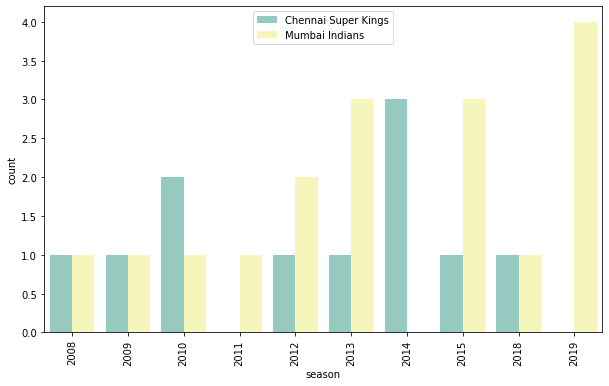

In [71]:
team1=input("Enter the Name of Team 1:")
team2=input("Enter the Name of Team 2:")
team1_vs_team2(team1,team2)

## Comparison between given batsmen

In [72]:
balls=deliveries.groupby(['batsman'])['ball'].count().reset_index()
runs=deliveries.groupby(['batsman'])['batsman_runs'].sum().reset_index()
balls=balls.merge(runs,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball':'ball_x','batsman_runs':'ball_y'},axis=1,inplace=True)
sixes=deliveries.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliveries.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
balls['strike_rate']=balls['ball_y']/balls['ball_x']*100
balls=balls.merge(sixes,left_on='batsman',right_on='batsman',how='outer')
balls=balls.merge(fours,left_on='batsman',right_on='batsman',how='outer')
compare=deliveries.groupby(["match_id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
compare=compare.groupby(['batsman','batting_team'])['batsman_runs'].max().reset_index()
balls=balls.merge(compare,left_on='batsman',right_on='batsman',how='outer')
balls.rename({'ball_x':'balls','ball_y':'runs','batsman_runs_x':"6's",'batsman_runs_y':"4's",'batting_team':'Team','batsman_runs':'Highest_score'},axis=1,inplace=True)
balls.head()

,batsman,balls,runs,strike_rate,6's,4's,Team,Highest_score
0,A Ashish Reddy,196,280,142.857143,16,15,Deccan Chargers,10
1,A Ashish Reddy,196,280,142.857143,16,15,Sunrisers Hyderabad,36
2,A Chandila,7,4,57.142857,0,0,Rajasthan Royals,4
3,A Chopra,75,53,70.666667,7,0,Kolkata Knight Riders,24
4,A Choudhary,20,25,125.000000,1,1,Royal Challengers Bangalore,15


In [73]:
def batsman_comparator(stat1,stat2,batsman1,batsman2):
    sns.FacetGrid(balls,hue='Team',height=8).map(plt.scatter, stat1,stat2, alpha=0.5).add_legend()
    bats1=balls[balls['batsman'].str.contains(batsman1)].sort_values(by=stat1,ascending=False)
    bats2=balls[balls['batsman'].str.contains(batsman2)].sort_values(by=stat1,ascending=False)
    plt.scatter(bats1[stat1],bats1[stat2]-1,s=75,c='#55ff33')
    plt.text(x=bats1[stat1].values[0],y=bats1[stat2].values[0],s=batsman1,fontsize=10, weight='bold', color='#f46d43')
    plt.scatter(bats2[stat1],bats2[stat2],s=75,c='#f73545')
    plt.text(x=bats2[stat1].values[0],y=bats2[stat2].values[0]+1,s=batsman2,fontsize=10, weight='bold', color='#ff58fd')
    plt.gcf().set_size_inches(15,10)
    plt.title('Batsman Comparator',size=25)
    plt.show()

Enter the Measures to Compare the Batsmen from:
runs  strike_rate  6's  4's
Enter the First Measure:runs
Enter the Second Measure:6's
Enter the Name of the First Batsman:V Kohli
Enter the Name of the Second Batsman:Dhoni


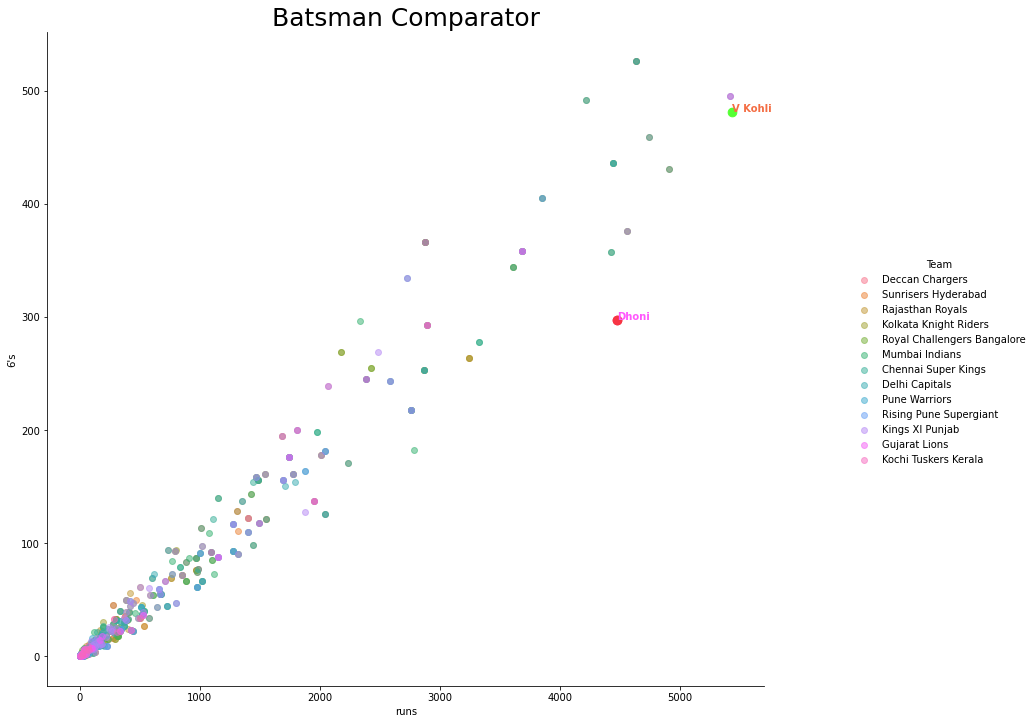

In [74]:
print("Enter the Measures to Compare the Batsmen from:\nruns  strike_rate  6's  4's")
stat1=input("Enter the First Measure:")
stat2=input("Enter the Second Measure:")
batsman1=input("Enter the Name of the First Batsman:")
batsman2=input("Enter the Name of the Second Batsman:")
batsman_comparator(stat1,stat2,batsman1,batsman2)